Expected SARSA implementation based on  Sarsa: On-Policy TD Control: <br>
http://incompleteideas.net/book/first/ebook/node64.html

In [ ]:
import gym 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
 
# For animation 
from IPython.display import clear_output
from time import sleep
from tqdm import tqdm

In [ ]:
def boltzmann(x, temperature):
    exponent = np.true_divide(x - np.max(x), temperature)
    prob_a =  np.exp(exponent) / np.sum(np.exp(exponent))

    return prob_a

def simulate_expected_sarsa(q, T, alpha):

    done = False
    r_sum = 0
    gam = 1

    s = env.reset()
    actionspace = range(env.action_space.n)

    while not done:

        # take step
        
        prob_a = boltzmann(q[s,:], T)
        cumsum_a = np.cumsum(prob_a)
        a = np.where(np.random.rand() < cumsum_a)[0][0]
        
        s_prime,r,done,info = env.step(a)
        
        prob_a_loop = boltzmann(q[s_prime,:], T)
        
        q_a = np.sum([np.dot(p, q[s_prime,action]) for p,action in zip(prob_a_loop,actionspace)])
        q[s,a] = q[s,a] + alpha * (r + gam*q_a - q[s,a])
  
        s = s_prime
        r_sum += r

    return r_sum, q

In [ ]:
"""
One u-shaped graph that shows the effect of the parameters on the final training performance, expressed as the return of the agent (averaged over the last 10 training episodes
and the 10 runs); note that this will typically end up as an upside-down u
"""

env = gym.make('Taxi-v2')
n_squares = 25 
n_passenger_locs = 5 
n_dropoffs = 4
      
T = [0.1, 1, 10]
alpha = [0.1, 0.5, 0.99]
n_episodes = 10

avg_rwd=[]
Q = []
final_rwd = []

for temperature in tqdm(T):
  for alp in alpha:

    for run in range(10):
      #Independent Run
      
      # Set up initial q-table 
      q = np.zeros(shape = (n_squares*n_passenger_locs*n_dropoffs, env.action_space.n))

      for simulate in range(100):
        r_sums = []

        for ep in range(n_episodes):
          r_sum, Q = simulate_expected_sarsa(q, temperature, alp)
          r_sums.append(r_sum)
      avg_rwd.append(np.mean(r_sums))
    final_rwd.append((np.mean(avg_rwd), temperature, alp))



100%|██████████| 3/3 [08:21<00:00, 157.17s/it]


In [ ]:
final_rwd

[(-4.96, 0.1, 0.1),
 (1.69, 0.1, 0.5),
 (3.7366666666666664, 0.1, 0.99),
 (-6.859999999999999, 1, 0.1),
 (-3.86, 1, 0.5),
 (-1.9033333333333327, 1, 0.99),
 (-66.58714285714285, 10, 0.1),
 (-75.10874999999999, 10, 0.5),
 (-76.37777777777778, 10, 0.99)]

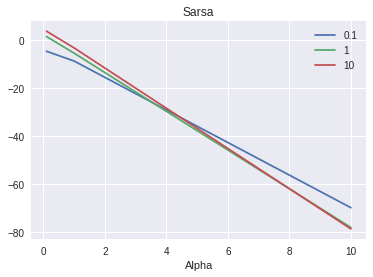

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(final_rwd)
df.columns = ['Avg Rewards','Temperature', 'Alpha']

fig, ax = plt.subplots()

for key, grp in df.groupby(['Temperature']):
  ax = grp.plot(ax=ax, kind='line', x='Alpha', y='Avg Rewards')
  
plt.legend(T, loc='best')

plt.title('Sarsa')
plt.show()


100%|██████████| 1/1 [00:18<00:00, 18.76s/it]


Text(0.5, 1.0, 'Average reward per epoch')

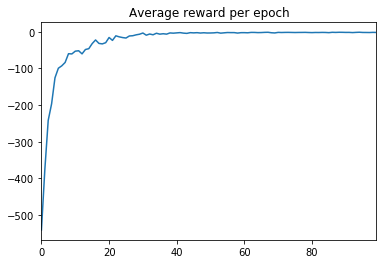

In [ ]:
""" Learning curves (mean and standard deviation computed based on the 10 runs) for what
    you pick as the best parameter setting for each algorithm """

env = gym.make('Taxi-v2')
n_squares = 25 
n_passenger_locs = 5 
n_dropoffs = 4
      
T = [0.1]
alpha = [0.9]
n_episodes = 10

total_reward=[]
Q = []
final_rwd = []

for tau in tqdm(T):
  for alp in alpha:

    for run in range(10):
      avg_rwd=[]
      #Independent Run
      
      # Set up initial q-table 
      q = np.zeros(shape = (n_squares*n_passenger_locs*n_dropoffs, env.action_space.n))
      
      for simulate in range(100):
        r_sums = []
        
        for ep in range(n_episodes):
          r_sum, Q = simulate_expected_sarsa(q, tau, alp)
          r_sums.append(r_sum)
          
        avg_rwd.append(np.mean(r_sums))
      total_reward.append(avg_rwd)

    #final_rwd.append(((sum(avg_rwd)/len(avg_rwd)), alp, tau))
      final_rwd.append((avg_rwd, alp, tau))

sarsa_mean = np.mean(total_reward, axis=0) - 10
sarsa_std = np.std(total_reward, axis=0) -10

df_mean_std = pd.DataFrame({"Mean": sarsa_mean,
                       "Standard Deviation": sarsa_std})
df_mean_std['Mean'].iloc[0:100].plot()

plt.title('Average reward per epoch')

In [ ]:
sarsa_std = np.std(total_reward, axis=0) +20


In [ ]:
df_mean_std['Standard Deviation'].iloc[0:100]+10

0     31.289911
1     43.165895
2     43.827550
3     34.411482
4     24.981001
5     19.419001
6     23.816834
7     19.855037
8     20.500363
9     12.911561
10    18.463664
11    16.833110
12    18.558904
13    23.292748
14    20.260464
15    19.877686
16    11.463983
17    20.833168
18    20.233181
19    17.479271
20     8.727978
21    14.512408
22     6.875093
23     8.808269
24    13.604470
25     7.178189
26     8.872069
27     7.729819
28     5.772010
29     3.834071
        ...    
70     0.948894
71     0.992774
72     0.654905
73     0.845044
74     0.467012
75     0.954411
76     1.464787
77     0.823468
78     1.086324
79     0.790506
80     1.220860
81     0.916515
82     1.284095
83     0.848587
84     1.192309
85     1.356319
86     0.829518
87     0.792717
88     0.744043
89     0.583866
90     1.077775
91     0.952943
92     1.424640
93     0.553624
94     0.976780
95     1.048046
96     1.619537
97     1.605646
98     0.896437
99     0.711407
Name: Standard Deviation

Text(0.5, 1.0, 'Average number of hints per epoch')

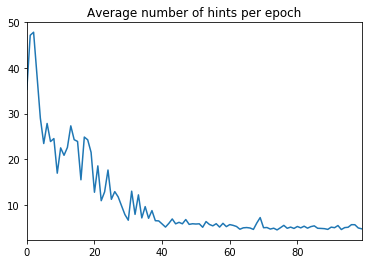

In [ ]:
(df_mean_std['Standard Deviation'].iloc[0:100]+14).plot()
plt.title('Average number of hints per epoch')

In [ ]:
"""Evaluate agent's performance"""

def performance(value_function):

  total_epochs, total_penalties = 0, 0
  episodes = 10
  env = gym.make('Taxi-v2')

  for run in range(10):
    total_reward = []
    for simulate in range(100):
        for _ in range(episodes):
            state = env.reset()
            epochs, penalties, reward = 0, 0, 0

            done = False
            inter_reward =[]
            while not done:
                action = np.argmax(value_function[state])
                state, reward, done, info = env.step(action)

                if reward == -10:
                    penalties += 1

                epochs += 1

            total_penalties += penalties
            total_epochs += epochs
            inter_reward.append(reward)
        total_reward.append(sum(inter_reward)/len(inter_reward))
      


  print(f"Results after {episodes} episodes")
  print(f"Average timesteps per episode: {total_epochs / episodes}")
  print(f"Average penalties per episode: {total_penalties / episodes}")
  
  return total_reward

t_sarsa = performance(Q)

Results after 10 episodes
Average timesteps per episode: 18888.0
Average penalties per episode: 858.2


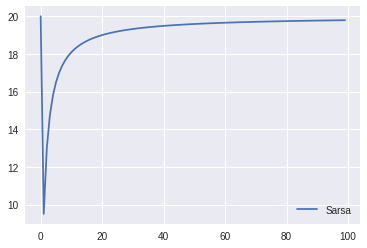

In [ ]:
df_ma = pd.DataFrame({"Sarsa": t_sarsa})
df_ma = df_ma.rolling(100, min_periods = 1).mean()
df_ma.iloc[0:100].plot()